In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import math
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import mean_squared_error


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:

# Read the dataset into a Pandas DataFrame

df = pd.read_csv('/content/drive/MyDrive/crypto.csv')

# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'].str[:10])

df


,Date,Open,High,Low,Close,Volume
0,2018-12-31,100.000000,100.000000,100.000000,100.000000,0
1,2019-01-01,NaN,NaN,NaN,NaN,0
2,2019-01-02,107.209999,107.209999,107.209999,107.209999,0
3,2019-01-03,103.699997,103.699997,103.699997,103.699997,0
4,2019-01-04,104.480003,104.480003,104.480003,104.480003,0
...,...,...,...,...,...,...
1908,2024-03-22,1417.188965,1440.395020,1343.369019,1356.844971,0
1909,2024-03-23,NaN,NaN,NaN,NaN,0
1910,2024-03-24,NaN,NaN,NaN,NaN,0
1911,2024-03-25,1400.348022,1520.832031,1390.744995,1496.098022,0


In [4]:

df['Date'] = pd.to_datetime(df['Date'])

# Filter rows where 'Open' column is not NaN
df = df[df['Open'].notna()]

# Reset index
df.reset_index(drop=True, inplace=True)

# Display the modified DataFrame
df



,Date,Open,High,Low,Close,Volume
0,2018-12-31,100.000000,100.000000,100.000000,100.000000,0
1,2019-01-02,107.209999,107.209999,107.209999,107.209999,0
2,2019-01-03,103.699997,103.699997,103.699997,103.699997,0
3,2019-01-04,104.480003,104.480003,104.480003,104.480003,0
4,2019-01-07,107.930000,107.930000,107.930000,107.930000,0
...,...,...,...,...,...,...
1275,2024-03-20,1344.958984,1417.015991,1294.715942,1410.272949,0
1276,2024-03-21,1414.946045,1458.172974,1386.230957,1416.850952,0
1277,2024-03-22,1417.188965,1440.395020,1343.369019,1356.844971,0
1278,2024-03-25,1400.348022,1520.832031,1390.744995,1496.098022,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1280 entries, 0 to 1279
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1280 non-null   datetime64[ns]
 1   Open    1280 non-null   float64       
 2   High    1280 non-null   float64       
 3   Low     1280 non-null   float64       
 4   Close   1280 non-null   float64       
 5   Volume  1280 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 60.1 KB


In [6]:
df.shape


(1280, 6)

In [7]:
# Setting the layout for our plot
layout = go.Layout(
    title='Stock Prices of DowJones',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

plot_data = [{'x':df['Date'], 'y':df['Close']}]
plot = go.Figure(data=plot_data, layout=layout)


iplot(plot)

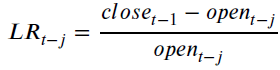

Where,
       


*   t is the orbservation at time 't'
*   𝑗 ∈ {1, 2, 3, 4, 5, 21, 63, 126, 252}
*   LR is the Lagged Returns



In [8]:
def calculate_lagged_returns(df, window_sizes):
    for window_size in window_sizes:

        lagged_returns = (df['Close'].shift(1) - df['Open'].shift(window_size)) / df['Open'].shift(window_size)
        lagged_returns_name = f'LR_{window_size}'
        df[lagged_returns_name] = lagged_returns
    return df


window_sizes = [1, 2, 3, 4, 5, 21, 63, 126, 252]

df_with_lagged_returns = calculate_lagged_returns(df, window_sizes)

df_with_lagged_returns


<ipython-input-8-1c7c2211b511>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-8-1c7c2211b511>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-8-1c7c2211b511>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-8-1c7c2211b51

,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252
0,2018-12-31,100.000000,100.000000,100.000000,100.000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-02,107.209999,107.209999,107.209999,107.209999,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-03,103.699997,103.699997,103.699997,103.699997,0,0.000000,0.072100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-04,104.480003,104.480003,104.480003,104.480003,0,0.000000,-0.032740,0.037000,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-07,107.930000,107.930000,107.930000,107.930000,0,0.000000,0.007522,-0.025464,0.044800,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,2024-03-20,1344.958984,1417.015991,1294.715942,1410.272949,0,-0.000843,-0.020802,-0.068776,-0.088633,-0.069241,0.265149,0.571278,1.382356,1.466901
1276,2024-03-21,1414.946045,1458.172974,1386.230957,1416.850952,0,0.048562,0.028341,0.007799,-0.041576,-0.062013,0.315536,0.617172,1.428653,1.287989
1277,2024-03-22,1417.188965,1440.395020,1343.369019,1356.844971,0,0.001346,0.053453,0.033137,0.012500,-0.037106,0.316474,0.598709,1.449028,1.334894
1278,2024-03-25,1400.348022,1520.832031,1390.744995,1496.098022,0,-0.042580,-0.041062,0.008837,-0.010618,-0.030381,0.260719,0.511586,1.393776,1.213252


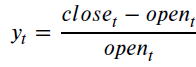

Where,
       


*   t is the orbservation at time 't'
*   y is the Target_variable



In [9]:
# Add the target variable column to the DataFrame

df_with_target_variable = df_with_lagged_returns.copy()
df_with_target_variable['Target_variable'] = (df_with_target_variable['Close'] - df_with_target_variable['Open']) / df_with_target_variable['Open']
df_with_target_variable


,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable
0,2018-12-31,100.000000,100.000000,100.000000,100.000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
1,2019-01-02,107.209999,107.209999,107.209999,107.209999,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2,2019-01-03,103.699997,103.699997,103.699997,103.699997,0,0.000000,0.072100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
3,2019-01-04,104.480003,104.480003,104.480003,104.480003,0,0.000000,-0.032740,0.037000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
4,2019-01-07,107.930000,107.930000,107.930000,107.930000,0,0.000000,0.007522,-0.025464,0.044800,NaN,NaN,NaN,NaN,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,2024-03-20,1344.958984,1417.015991,1294.715942,1410.272949,0,-0.000843,-0.020802,-0.068776,-0.088633,-0.069241,0.265149,0.571278,1.382356,1.466901,0.048562
1276,2024-03-21,1414.946045,1458.172974,1386.230957,1416.850952,0,0.048562,0.028341,0.007799,-0.041576,-0.062013,0.315536,0.617172,1.428653,1.287989,0.001346
1277,2024-03-22,1417.188965,1440.395020,1343.369019,1356.844971,0,0.001346,0.053453,0.033137,0.012500,-0.037106,0.316474,0.598709,1.449028,1.334894,-0.042580
1278,2024-03-25,1400.348022,1520.832031,1390.744995,1496.098022,0,-0.042580,-0.041062,0.008837,-0.010618,-0.030381,0.260719,0.511586,1.393776,1.213252,0.068376


In [10]:
df = df_with_target_variable.dropna()
df

,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable
252,2019-12-31,145.082993,145.626999,141.973999,142.309006,0,-0.018594,0.019520,0.018890,0.004641,-0.010270,-0.064633,-0.131821,-0.387793,0.450380,-0.019120
253,2020-01-02,143.414001,143.414001,138.149002,138.806000,0,-0.019120,-0.037060,0.000337,-0.000281,-0.014262,-0.057563,-0.159824,-0.403642,0.327386,-0.032131
254,2020-01-03,138.738007,146.947998,137.307007,145.089005,0,-0.032131,-0.043265,-0.060764,-0.024286,-0.024890,-0.071495,-0.172394,-0.455876,0.338534,0.045777
255,2020-01-06,147.953003,153.313004,147.429993,152.807007,0,0.045777,0.011679,0.000041,-0.018249,0.019879,-0.028316,-0.124176,-0.429098,0.388677,0.032808
256,2020-01-07,153.722000,161.451004,153.722000,159.307999,0,0.032808,0.101407,0.065496,0.053239,0.033975,0.034528,-0.062994,-0.423217,0.415797,0.036338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,2024-03-20,1344.958984,1417.015991,1294.715942,1410.272949,0,-0.000843,-0.020802,-0.068776,-0.088633,-0.069241,0.265149,0.571278,1.382356,1.466901,0.048562
1276,2024-03-21,1414.946045,1458.172974,1386.230957,1416.850952,0,0.048562,0.028341,0.007799,-0.041576,-0.062013,0.315536,0.617172,1.428653,1.287989,0.001346
1277,2024-03-22,1417.188965,1440.395020,1343.369019,1356.844971,0,0.001346,0.053453,0.033137,0.012500,-0.037106,0.316474,0.598709,1.449028,1.334894,-0.042580
1278,2024-03-25,1400.348022,1520.832031,1390.744995,1496.098022,0,-0.042580,-0.041062,0.008837,-0.010618,-0.030381,0.260719,0.511586,1.393776,1.213252,0.068376


In [11]:
# Calculate the lengths for train, validation, and test sets
total_length = len(df)
train_length = int(total_length * 0.7)
validation_length = int(total_length * 0.15)

# Split the data into training, validation, and test sets
train_set = df.iloc[:train_length]
validation_set = df.iloc[train_length:train_length+validation_length]
test_set = df.iloc[train_length+validation_length:]

x_train = train_set.iloc[:, 6:-1].values
y_train = train_set.iloc[:, -1].values

x_valid = validation_set.iloc[:, 6:-1].values
y_valid = validation_set.iloc[:, -1].values

x_test = test_set.iloc[:, 6:-1].values
y_test = test_set.iloc[:, -1].values



In [12]:
print("x_train: ",x_train.shape)
print("y_train: ",y_train.shape)
print("x_valid: ",x_valid.shape)
print("y_valid: ",y_valid.shape)
print("x_test: ",x_test.shape)
print("y_test: ",y_test.shape)


x_train:  (719, 9)
y_train:  (719,)
x_valid:  (154, 9)
y_valid:  (154,)
x_test:  (155, 9)
y_test:  (155,)


In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


# Define parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 0.01, 0.001,0.0001],
    'epsilon': [0.1, 0.01, 0.001,0.0001]
}

# Create SVR model
svr = SVR(kernel='rbf')

# Perform grid search with cross-validation
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'epsilon': [0.1, 0.01, 0.001, 0.0001],
                         'gamma': [0.1, 0.01, 0.001, 0.0001]},
             scoring='neg_mean_squared_error', verbose=2)

In [14]:
best_svr = grid_search.best_estimator_

In [15]:
# Print the best hyperparameters found from grid search

print("Best hyperparameters found from grid search:")
print(grid_search.best_params_)

Best hyperparameters found from grid search:
{'C': 0.1, 'epsilon': 0.0001, 'gamma': 0.0001}


In [16]:
best_model_path = "best_svr_model.pkl"
joblib.dump((best_svr, grid_search.best_params_), best_model_path)

drive.mount('/content/drive')

drive_path = "/content/drive/MyDrive/"

!cp best_svr_model.pkl "{drive_path}"

print(f"Model saved in Google Drive: {drive_path}best_svr_model.pkl")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model saved in Google Drive: /content/drive/MyDrive/best_svr_model.pkl


In [17]:
# Load best model and its hyperparameters
drive_path = "/content/drive/MyDrive/"

loaded_model_path = drive_path + "best_svr_model.pkl"
best_svr, best_hyperparameters_svr = joblib.load(loaded_model_path)
print("model loaded and stored in variable 'best_svr'")

print("Loaded hyperparameters:")
print(best_hyperparameters_svr)



model loaded and stored in variable 'best_svr'
Loaded hyperparameters:
{'C': 0.1, 'epsilon': 0.0001, 'gamma': 0.0001}


In [18]:
# Make predictions
y_train_pred = best_svr.predict(x_train)
y_valid_pred = best_svr.predict(x_valid)
y_test_pred = best_svr.predict(x_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
valid_rmse = np.sqrt(mean_squared_error(y_valid, y_valid_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))


In [19]:
print("Train RMSE (SVR): ",train_rmse)
print("Validation RMSE (SVR): ",valid_rmse)
print("Test RMSE (SVR): ",test_rmse)


Train RMSE (SVR):  0.02962115330690516
Validation RMSE (SVR):  0.015730963986265854
Test RMSE (SVR):  0.015244186693135776


In [20]:
# Add the predicted target variable to the validation set with the new column name

validation_set['Target_prediction'] = y_valid_pred
validation_set


<ipython-input-20-59e6355016a7>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable,Target_prediction
971,2022-12-30,382.949005,383.679993,377.997009,382.446991,0,0.000783,0.007791,-0.007931,-0.013458,-0.013458,-0.059862,-0.137642,-0.054810,-0.676122,-0.001311,-0.000233
972,2023-01-03,385.462006,386.020996,385.462006,385.898010,0,-0.001311,-0.001311,0.005683,-0.010007,-0.015522,-0.050090,-0.139201,-0.132299,-0.676800,0.001131,-0.000261
973,2023-01-04,392.604004,393.463989,392.566986,393.463989,0,0.001131,0.007701,0.007701,0.014757,-0.001074,-0.041519,-0.161181,-0.126036,-0.678876,0.002190,-0.000260
974,2023-01-05,392.259003,392.561005,391.757996,392.046997,0,0.002190,0.020759,0.027458,0.027458,0.034653,-0.018482,-0.144735,-0.160982,-0.666218,-0.000540,-0.000279
975,2023-01-06,392.259003,396.770996,388.822998,395.248993,0,-0.000540,-0.001419,0.017083,0.023758,0.023758,-0.020306,-0.135752,-0.164004,-0.644554,0.007622,-0.000282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,2023-08-07,629.825012,629.984009,629.414001,629.710022,0,-0.006577,-0.006577,-0.006723,-0.010598,-0.012120,-0.033023,-0.004117,0.166689,0.214269,-0.000183,-0.000300
1121,2023-08-08,644.017029,644.500977,641.104004,642.169983,0,-0.000183,-0.004208,-0.004208,-0.004354,-0.008238,-0.033097,-0.004312,0.197782,0.217165,-0.002868,-0.000290
1122,2023-08-09,637.549988,638.620972,447.998993,638.455994,0,-0.002868,0.019601,0.015496,0.015496,0.015346,-0.019040,0.057507,0.199246,0.153865,0.001421,-0.000284
1123,2023-08-10,636.455994,636.947021,636.278015,636.620972,0,0.001421,-0.008635,0.013704,0.009623,0.009623,-0.019582,0.053660,0.207162,0.183602,0.000259,-0.000285


In [21]:
# Add a new column 'Predicted_close' to validation_set

validation_set['Predicted_close'] = (validation_set['Target_prediction'] * validation_set['Open']) + validation_set['Open']
validation_set


<ipython-input-21-e78b35780010>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable,Target_prediction,Predicted_close
971,2022-12-30,382.949005,383.679993,377.997009,382.446991,0,0.000783,0.007791,-0.007931,-0.013458,-0.013458,-0.059862,-0.137642,-0.054810,-0.676122,-0.001311,-0.000233,382.859881
972,2023-01-03,385.462006,386.020996,385.462006,385.898010,0,-0.001311,-0.001311,0.005683,-0.010007,-0.015522,-0.050090,-0.139201,-0.132299,-0.676800,0.001131,-0.000261,385.361263
973,2023-01-04,392.604004,393.463989,392.566986,393.463989,0,0.001131,0.007701,0.007701,0.014757,-0.001074,-0.041519,-0.161181,-0.126036,-0.678876,0.002190,-0.000260,392.501849
974,2023-01-05,392.259003,392.561005,391.757996,392.046997,0,0.002190,0.020759,0.027458,0.027458,0.034653,-0.018482,-0.144735,-0.160982,-0.666218,-0.000540,-0.000279,392.149438
975,2023-01-06,392.259003,396.770996,388.822998,395.248993,0,-0.000540,-0.001419,0.017083,0.023758,0.023758,-0.020306,-0.135752,-0.164004,-0.644554,0.007622,-0.000282,392.148317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,2023-08-07,629.825012,629.984009,629.414001,629.710022,0,-0.006577,-0.006577,-0.006723,-0.010598,-0.012120,-0.033023,-0.004117,0.166689,0.214269,-0.000183,-0.000300,629.636169
1121,2023-08-08,644.017029,644.500977,641.104004,642.169983,0,-0.000183,-0.004208,-0.004208,-0.004354,-0.008238,-0.033097,-0.004312,0.197782,0.217165,-0.002868,-0.000290,643.830534
1122,2023-08-09,637.549988,638.620972,447.998993,638.455994,0,-0.002868,0.019601,0.015496,0.015496,0.015346,-0.019040,0.057507,0.199246,0.153865,0.001421,-0.000284,637.368777
1123,2023-08-10,636.455994,636.947021,636.278015,636.620972,0,0.001421,-0.008635,0.013704,0.009623,0.009623,-0.019582,0.053660,0.207162,0.183602,0.000259,-0.000285,636.274906


In [22]:
pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=cb1fbf9f6a378db1dbd2929836879e94a8b0b1b8c3035cb122f6e4732a4b28f2
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [23]:
import eli5
from eli5.sklearn import PermutationImportance



perm = PermutationImportance(best_svr, random_state=1)
perm.fit(x_valid, y_valid)
eli5.show_weights(perm, feature_names=['LR_1', 'LR_2', 'LR_3', 'LR_4', 'LR_5', 'LR_21', 'LR_63', 'LR_126', 'LR_252'])


Weight,Feature
0.0003 ± 0.0013,LR_252
0.0001 ± 0.0001,LR_63
0.0001 ± 0.0001,LR_21
0.0000 ± 0.0000,LR_3
0.0000 ± 0.0000,LR_1
-0.0000 ± 0.0000,LR_2
-0.0000 ± 0.0001,LR_4
-0.0000 ± 0.0001,LR_5
-0.0010 ± 0.0015,LR_126


In [24]:
weights = perm.feature_importances_
feature_names = ['LR_1', 'LR_2', 'LR_3', 'LR_4', 'LR_5', 'LR_21', 'LR_63', 'LR_126', 'LR_252']

feature_weights = list(zip(feature_names, weights))

sorted_features = sorted(feature_weights, key=lambda x: x[1], reverse=True)

sorted_feature_names = [feature[0] for feature in sorted_features]

print("Ranked Features based on Permutation Importance:")
print(sorted_feature_names)


Ranked Features based on Permutation Importance:
['LR_252', 'LR_63', 'LR_21', 'LR_3', 'LR_1', 'LR_2', 'LR_4', 'LR_5', 'LR_126']


In [25]:
validation_set_pi=validation_set.copy()
features_to_drop = ['Target_prediction','Predicted_close']
validation_set_pi.drop(features_to_drop, axis=1, inplace=True)

validation_set_pi


,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable
971,2022-12-30,382.949005,383.679993,377.997009,382.446991,0,0.000783,0.007791,-0.007931,-0.013458,-0.013458,-0.059862,-0.137642,-0.054810,-0.676122,-0.001311
972,2023-01-03,385.462006,386.020996,385.462006,385.898010,0,-0.001311,-0.001311,0.005683,-0.010007,-0.015522,-0.050090,-0.139201,-0.132299,-0.676800,0.001131
973,2023-01-04,392.604004,393.463989,392.566986,393.463989,0,0.001131,0.007701,0.007701,0.014757,-0.001074,-0.041519,-0.161181,-0.126036,-0.678876,0.002190
974,2023-01-05,392.259003,392.561005,391.757996,392.046997,0,0.002190,0.020759,0.027458,0.027458,0.034653,-0.018482,-0.144735,-0.160982,-0.666218,-0.000540
975,2023-01-06,392.259003,396.770996,388.822998,395.248993,0,-0.000540,-0.001419,0.017083,0.023758,0.023758,-0.020306,-0.135752,-0.164004,-0.644554,0.007622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,2023-08-07,629.825012,629.984009,629.414001,629.710022,0,-0.006577,-0.006577,-0.006723,-0.010598,-0.012120,-0.033023,-0.004117,0.166689,0.214269,-0.000183
1121,2023-08-08,644.017029,644.500977,641.104004,642.169983,0,-0.000183,-0.004208,-0.004208,-0.004354,-0.008238,-0.033097,-0.004312,0.197782,0.217165,-0.002868
1122,2023-08-09,637.549988,638.620972,447.998993,638.455994,0,-0.002868,0.019601,0.015496,0.015496,0.015346,-0.019040,0.057507,0.199246,0.153865,0.001421
1123,2023-08-10,636.455994,636.947021,636.278015,636.620972,0,0.001421,-0.008635,0.013704,0.009623,0.009623,-0.019582,0.053660,0.207162,0.183602,0.000259


In [26]:
x_valid_pi = validation_set_pi.iloc[:, 6:-1].values
y_valid_pi = validation_set_pi.iloc[:, -1].values

In [27]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


# Define parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 0.01, 0.001,0.0001],
    'epsilon': [0.1, 0.01, 0.001,0.0001]
}

# Create SVR model
svr = SVR(kernel='rbf')

# Perform grid search with cross-validation
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(x_valid_pi, y_valid_pi)


Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'epsilon': [0.1, 0.01, 0.001, 0.0001],
                         'gamma': [0.1, 0.01, 0.001, 0.0001]},
             scoring='neg_mean_squared_error', verbose=2)

In [28]:
# Get the best model from grid search
best_svr_pi = grid_search.best_estimator_


In [29]:
y_valid_pred_pi = best_svr_pi.predict(x_valid_pi)

valid_rmse_pi = np.sqrt(mean_squared_error(y_valid_pi, y_valid_pred_pi))

print("Validation RMSE:", valid_rmse_pi)


Validation RMSE: 0.015631342874344395


In [30]:
loss_difference=valid_rmse-valid_rmse_pi
loss_difference

9.962111192145934e-05

In [31]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

validation_set_pi = validation_set.copy()
validation_set_pi.drop(['Target_prediction', 'Predicted_close'], axis=1, inplace=True)


rmse_dict = {}
features_dropped = []

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 0.01, 0.001, 0.0001],
    'epsilon': [0.1, 0.01, 0.001, 0.0001]
}

svr = SVR(kernel='rbf')

for feature in sorted_feature_names[::-1]:

    validation_set_pi.drop([feature], axis=1, inplace=True)

    x_valid_pi = validation_set_pi.iloc[:, 6:-1].values
    y_valid_pi = validation_set_pi.iloc[:, -1].values

    if x_valid_pi.shape[1] > 0:
        grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
        grid_search.fit(x_valid_pi, y_valid_pi)

        best_svr_pi = grid_search.best_estimator_

        y_valid_pred_pi = best_svr_pi.predict(x_valid_pi)

        valid_rmse_pi = np.sqrt(mean_squared_error(y_valid_pi, y_valid_pred_pi))

        feature_names = validation_set_pi.columns[6:-1].tolist()

        rmse_dict[tuple(feature_names)] = valid_rmse_pi

        features_dropped.append(feature)

    else:
        print("No features left to drop. Exiting loop.")
        break

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
No features left to drop. Exiting loop.


In [32]:
print(rmse_dict)

{('LR_1', 'LR_2', 'LR_3', 'LR_4', 'LR_5', 'LR_21', 'LR_63', 'LR_252'): 0.015679194265001268, ('LR_1', 'LR_2', 'LR_3', 'LR_4', 'LR_21', 'LR_63', 'LR_252'): 0.015605971643426636, ('LR_1', 'LR_2', 'LR_3', 'LR_21', 'LR_63', 'LR_252'): 0.015665449138748618, ('LR_1', 'LR_3', 'LR_21', 'LR_63', 'LR_252'): 0.01562903149783139, ('LR_3', 'LR_21', 'LR_63', 'LR_252'): 0.015629798346875796, ('LR_21', 'LR_63', 'LR_252'): 0.01550648872347361, ('LR_63', 'LR_252'): 0.01572770046234376, ('LR_252',): 0.015671905263228963}


In [33]:
# Convert rmse_dict keys to a list of tuples
feature_combinations = list(rmse_dict.keys())

# Initialize a new dictionary to store the loss differences
rmse_loss_dict = {}

# Iterate over the indices of feature_combinations
for i in range(len(feature_combinations)):
    # Calculate the loss difference
    loss_difference = valid_rmse - rmse_dict[feature_combinations[i]]

    # Store the feature combination and its loss difference in rmse_loss_dict
    rmse_loss_dict[feature_combinations[i]] = loss_difference

print(rmse_loss_dict)


{('LR_1', 'LR_2', 'LR_3', 'LR_4', 'LR_5', 'LR_21', 'LR_63', 'LR_252'): 5.176972126458637e-05, ('LR_1', 'LR_2', 'LR_3', 'LR_4', 'LR_21', 'LR_63', 'LR_252'): 0.00012499234283921794, ('LR_1', 'LR_2', 'LR_3', 'LR_21', 'LR_63', 'LR_252'): 6.55148475172361e-05, ('LR_1', 'LR_3', 'LR_21', 'LR_63', 'LR_252'): 0.00010193248843446551, ('LR_3', 'LR_21', 'LR_63', 'LR_252'): 0.00010116563939005854, ('LR_21', 'LR_63', 'LR_252'): 0.00022447526279224458, ('LR_63', 'LR_252'): 3.2635239220930867e-06, ('LR_252',): 5.90587230368915e-05}


In [34]:
# Find the feature combination with the maximum loss difference
max_loss_feature_combination = max(rmse_loss_dict, key=rmse_loss_dict.get)
max_loss_difference = rmse_loss_dict[max_loss_feature_combination]

# Print the results
print("Feature Combination with Maximum Loss Difference:", max_loss_feature_combination)
print("Maximum Loss Difference:", max_loss_difference)


Feature Combination with Maximum Loss Difference: ('LR_21', 'LR_63', 'LR_252')
Maximum Loss Difference: 0.00022447526279224458


In [35]:
import plotly.graph_objects as go

# Sort DataFrame by 'Date'
validation_set.sort_values(by='Date', inplace=True)

# Create a Plotly figure
fig = go.Figure()

# Add actual close data as a scatter plot
fig.add_trace(go.Scatter(x=validation_set['Date'], y=validation_set['Close'], mode='lines', name='Actual Close', marker=dict(color='blue')))

# Add predicted close data as a scatter plot
fig.add_trace(go.Scatter(x=validation_set['Date'], y=validation_set['Predicted_close'], mode='markers', name='Predicted Close', marker=dict(color='red')))

# Update layout
fig.update_layout(title='Stock Market Performance (Validation Set)',
                  xaxis_title='Date',
                  yaxis_title='Close Price',
                  xaxis=dict(type='category'),
                  hovermode='x unified',  # Show hover information for both traces
                  template='plotly_white')

# Show the plot
fig.show()


<ipython-input-35-70a4f92b4860>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


test_set_pi = test_set.copy()
selected_features = list(max_loss_feature_combination) + ['Target_variable']


test_set_pi = test_set[selected_features]

x_test_pi = test_set_pi.iloc[:, 0:-1].values
y_test_pi = test_set_pi.iloc[:, -1].values


param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 0.01, 0.001,0.0001],
    'epsilon': [0.1, 0.01, 0.001,0.0001]
}

svr = SVR(kernel='rbf')

grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(x_test_pi, y_test_pi)


Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'epsilon': [0.1, 0.01, 0.001, 0.0001],
                         'gamma': [0.1, 0.01, 0.001, 0.0001]},
             scoring='neg_mean_squared_error', verbose=2)

In [37]:
best_svr_pi_test = grid_search.best_estimator_

y_test_pred_pi = best_svr_pi_test.predict(x_test_pi)

test_rmse_pi = np.sqrt(mean_squared_error(y_test_pi, y_test_pred_pi))

print("Test RMSE:", test_rmse_pi)



Test RMSE: 0.015163815762641468


In [38]:
test_set['Target_prediction'] = y_test_pred

test_set['Predicted_close'] = (test_set['Target_prediction'] * test_set['Open']) + test_set['Open']

test_set


<ipython-input-38-1e80d68ee31b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-38-1e80d68ee31b>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable,Target_prediction,Predicted_close
1125,2023-08-14,634.812988,635.846008,634.692993,635.737000,0,-0.002495,-0.002495,-0.004207,-0.014206,0.008007,-0.062661,0.070311,0.274482,0.106861,0.001456,-2.480110e-04,634.655548
1126,2023-08-15,629.450989,629.690002,629.101013,629.241028,0,0.001456,-0.001130,-0.001130,-0.002844,-0.012857,-0.029317,0.054755,0.291112,0.108376,-0.000334,-2.382040e-04,629.301051
1127,2023-08-16,621.218994,622.481018,621.218994,621.536011,0,-0.000334,-0.008777,-0.011336,-0.011336,-0.013033,-0.025703,0.043978,0.239754,0.101073,0.000510,-2.543425e-04,621.060992
1128,2023-08-17,561.750000,568.030029,559.442017,565.616028,0,0.000510,-0.012574,-0.020915,-0.023442,-0.023442,-0.041991,0.040135,0.131841,0.092845,0.006882,-2.922852e-04,561.585809
1129,2023-08-18,561.750000,581.328003,557.299011,564.625000,0,0.006882,-0.089506,-0.101414,-0.109004,-0.111304,-0.127996,-0.050024,0.039548,-0.005479,0.005118,-2.955235e-04,561.583990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,2024-03-20,1344.958984,1417.015991,1294.715942,1410.272949,0,-0.000843,-0.020802,-0.068776,-0.088633,-0.069241,0.265149,0.571278,1.382356,1.466901,0.048562,-3.695955e-05,1344.909275
1276,2024-03-21,1414.946045,1458.172974,1386.230957,1416.850952,0,0.048562,0.028341,0.007799,-0.041576,-0.062013,0.315536,0.617172,1.428653,1.287989,0.001346,3.274623e-06,1414.950678
1277,2024-03-22,1417.188965,1440.395020,1343.369019,1356.844971,0,0.001346,0.053453,0.033137,0.012500,-0.037106,0.316474,0.598709,1.449028,1.334894,-0.042580,-2.889226e-06,1417.184870
1278,2024-03-25,1400.348022,1520.832031,1390.744995,1496.098022,0,-0.042580,-0.041062,0.008837,-0.010618,-0.030381,0.260719,0.511586,1.393776,1.213252,0.068376,2.139622e-07,1400.348322


In [39]:
import plotly.graph_objects as go

test_set.sort_values(by='Date', inplace=True)

fig = go.Figure()

fig.add_trace(go.Scatter(x=test_set['Date'], y=test_set['Close'], mode='lines', name='Actual Close', marker=dict(color='blue')))

fig.add_trace(go.Scatter(x=test_set['Date'], y=test_set['Predicted_close'], mode='markers', name='Predicted Close', marker=dict(color='red')))

fig.update_layout(title='Stock Market Performance (Test Set)',
                  xaxis_title='Date',
                  yaxis_title='Close Price',
                  xaxis=dict(type='category'),
                  hovermode='x unified',
                  template='plotly_white')

fig.show()


<ipython-input-39-8169664d4a58>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [40]:
test_set['Target_prediction'] = y_test_pred
test_set['Predicted_close'] = (test_set['Target_prediction'] * test_set['Open']) + test_set['Open']
test_set

<ipython-input-40-dc11733f5df5>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-40-dc11733f5df5>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable,Target_prediction,Predicted_close
1125,2023-08-14,634.812988,635.846008,634.692993,635.737000,0,-0.002495,-0.002495,-0.004207,-0.014206,0.008007,-0.062661,0.070311,0.274482,0.106861,0.001456,-2.480110e-04,634.655548
1126,2023-08-15,629.450989,629.690002,629.101013,629.241028,0,0.001456,-0.001130,-0.001130,-0.002844,-0.012857,-0.029317,0.054755,0.291112,0.108376,-0.000334,-2.382040e-04,629.301051
1127,2023-08-16,621.218994,622.481018,621.218994,621.536011,0,-0.000334,-0.008777,-0.011336,-0.011336,-0.013033,-0.025703,0.043978,0.239754,0.101073,0.000510,-2.543425e-04,621.060992
1128,2023-08-17,561.750000,568.030029,559.442017,565.616028,0,0.000510,-0.012574,-0.020915,-0.023442,-0.023442,-0.041991,0.040135,0.131841,0.092845,0.006882,-2.922852e-04,561.585809
1129,2023-08-18,561.750000,581.328003,557.299011,564.625000,0,0.006882,-0.089506,-0.101414,-0.109004,-0.111304,-0.127996,-0.050024,0.039548,-0.005479,0.005118,-2.955235e-04,561.583990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,2024-03-20,1344.958984,1417.015991,1294.715942,1410.272949,0,-0.000843,-0.020802,-0.068776,-0.088633,-0.069241,0.265149,0.571278,1.382356,1.466901,0.048562,-3.695955e-05,1344.909275
1276,2024-03-21,1414.946045,1458.172974,1386.230957,1416.850952,0,0.048562,0.028341,0.007799,-0.041576,-0.062013,0.315536,0.617172,1.428653,1.287989,0.001346,3.274623e-06,1414.950678
1277,2024-03-22,1417.188965,1440.395020,1343.369019,1356.844971,0,0.001346,0.053453,0.033137,0.012500,-0.037106,0.316474,0.598709,1.449028,1.334894,-0.042580,-2.889226e-06,1417.184870
1278,2024-03-25,1400.348022,1520.832031,1390.744995,1496.098022,0,-0.042580,-0.041062,0.008837,-0.010618,-0.030381,0.260719,0.511586,1.393776,1.213252,0.068376,2.139622e-07,1400.348322


In [41]:
import pandas as pd

combined_df = pd.concat([train_set, validation_set, test_set], axis=0)

combined_df.reset_index(drop=True, inplace=True)

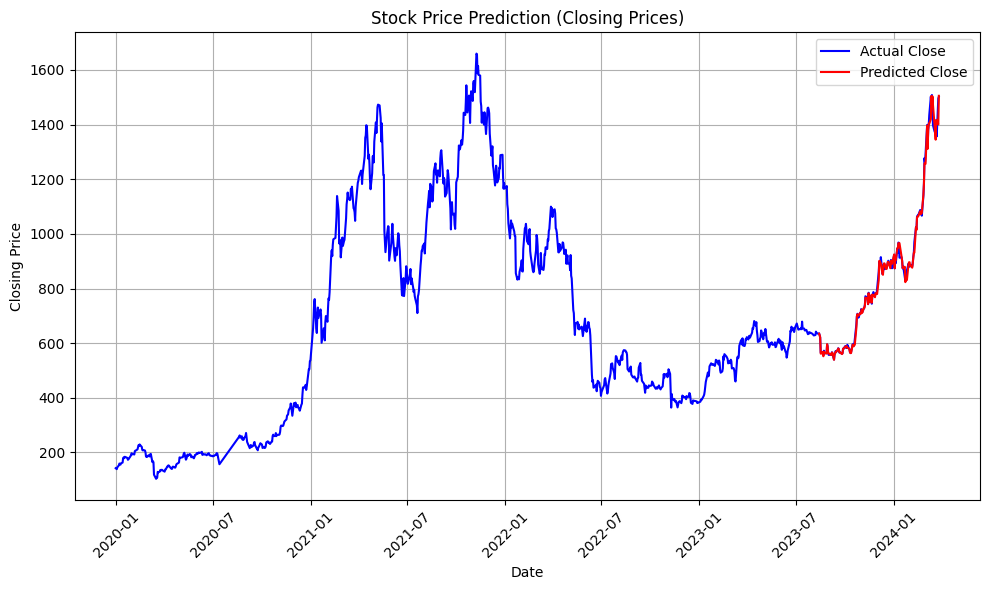

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(combined_df['Date'],combined_df['Close'] , label='Actual Close', color='blue')
plt.plot(test_set['Date'],test_set['Predicted_close'] , label='Predicted Close', color='red')

plt.title('Stock Price Prediction (Closing Prices)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Datasets to carry out the rest of the study (15-20 Datasets)

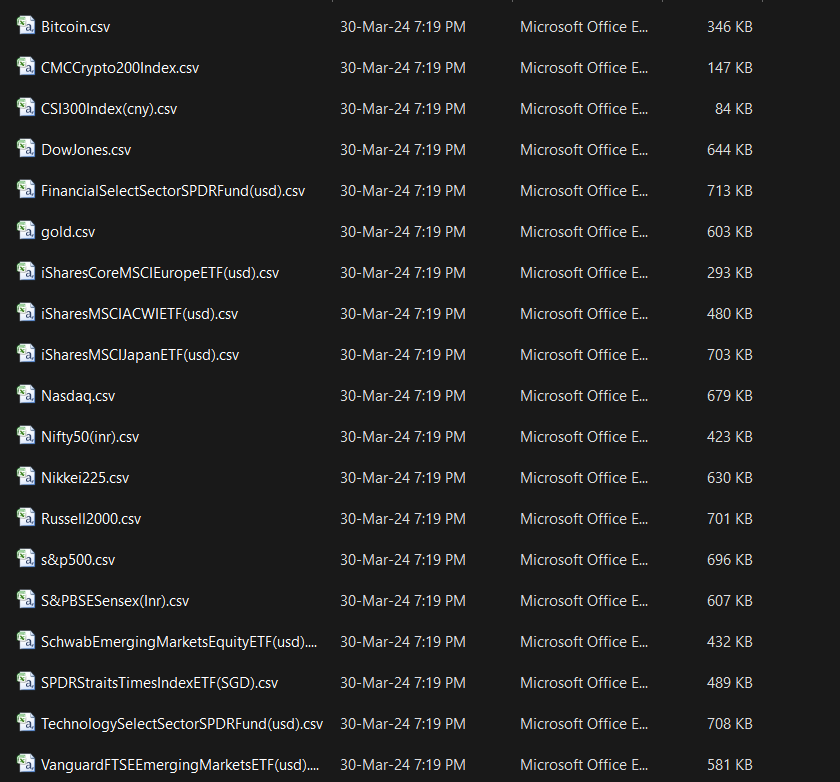

## Other Machine Learning models to experimentation   (4 Models)


*   Gradient Boosting Decision Tree
*   XGBoost
*   Random Forest





In [43]:
from sklearn.ensemble import GradientBoostingRegressor

# Define parameter grid for GridSearchCV
param_grid_gbdt = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7]
}

# Create GBDT model
gbdt = GradientBoostingRegressor()

# Perform grid search with cross-validation
grid_search_gbdt = GridSearchCV(gbdt, param_grid_gbdt, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search_gbdt.fit(x_train, y_train)

# Get the best model from grid search
best_gbdt = grid_search_gbdt.best_estimator_

# Print the best hyperparameters found from grid search
print("Best hyperparameters found for GBDT:")
print(grid_search_gbdt.best_params_)

# Make predictions
y_train_pred_gbdt = best_gbdt.predict(x_train)
y_valid_pred_gbdt = best_gbdt.predict(x_valid)
y_test_pred_gbdt = best_gbdt.predict(x_test)

# Evaluate the model
train_rmse_gbdt = np.sqrt(mean_squared_error(y_train, y_train_pred_gbdt))
valid_rmse_gbdt = np.sqrt(mean_squared_error(y_valid, y_valid_pred_gbdt))
test_rmse_gbdt = np.sqrt(mean_squared_error(y_test, y_test_pred_gbdt))

print("Train RMSE (GBDT):", train_rmse_gbdt)
print("Validation RMSE (GBDT):", valid_rmse_gbdt)
print("Test RMSE (GBDT):", test_rmse_gbdt)

# Plotting

# Visualization for GBDT predictions
# Use the same approach as you did for SVR to visualize GBDT predictions.


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best hyperparameters found for GBDT:
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Train RMSE (GBDT): 0.028084774514523417
Validation RMSE (GBDT): 0.015686446929970503
Test RMSE (GBDT): 0.015206468721409282


In [44]:
import xgboost as xgb

# Define parameter grid for GridSearchCV
param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7]
}

# Create XGBoost model
xgboost = xgb.XGBRegressor()

# Perform grid search with cross-validation
grid_search_xgb = GridSearchCV(xgboost, param_grid_xgb, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search_xgb.fit(x_train, y_train)

# Get the best model from grid search
best_xgb = grid_search_xgb.best_estimator_

# Print the best hyperparameters found from grid search
print("Best hyperparameters found for XGBoost:")
print(grid_search_xgb.best_params_)

# Make predictions
y_train_pred_xgb = best_xgb.predict(x_train)
y_valid_pred_xgb = best_xgb.predict(x_valid)
y_test_pred_xgb = best_xgb.predict(x_test)

# Evaluate the model
train_rmse_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
valid_rmse_xgb = np.sqrt(mean_squared_error(y_valid, y_valid_pred_xgb))
test_rmse_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))

print("Train RMSE (XGBoost):", train_rmse_xgb)
print("Validation RMSE (XGBoost):", valid_rmse_xgb)
print("Test RMSE (XGBoost):", test_rmse_xgb)

# Plotting

# Visualization for XGBoost predictions
# Use the same approach as you did for SVR to visualize XGBoost predictions.


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best hyperparameters found for XGBoost:
{'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 50}
Train RMSE (XGBoost): 0.02673072625642954
Validation RMSE (XGBoost): 0.015889369035551115
Test RMSE (XGBoost): 0.01534188405853333


In [45]:
from sklearn.ensemble import RandomForestRegressor

# Define parameter grid for GridSearchCV
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30]
}

# Create Random Forest model
random_forest = RandomForestRegressor()

# Perform grid search with cross-validation
grid_search_rf = GridSearchCV(random_forest, param_grid_rf, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search_rf.fit(x_train, y_train)

# Get the best model from grid search
best_rf = grid_search_rf.best_estimator_

# Print the best hyperparameters found from grid search
print("Best hyperparameters found for Random Forest:")
print(grid_search_rf.best_params_)

# Make predictions
y_train_pred_rf = best_rf.predict(x_train)
y_valid_pred_rf = best_rf.predict(x_valid)
y_test_pred_rf = best_rf.predict(x_test)

# Evaluate the model
train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
valid_rmse_rf = np.sqrt(mean_squared_error(y_valid, y_valid_pred_rf))
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))

print("Train RMSE (Random Forest):", train_rmse_rf)
print("Validation RMSE (Random Forest):", valid_rmse_rf)
print("Test RMSE (Random Forest):", test_rmse_rf)

# Plotting

# Visualization for Random Forest predictions
# Use the same approach as you did for SVR to visualize Random Forest predictions.


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best hyperparameters found for Random Forest:
{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}
Train RMSE (Random Forest): 0.01146558956196785
Validation RMSE (Random Forest): 0.017176888743066426
Test RMSE (Random Forest): 0.016135460620568913
